## Import Libraries
Loading all libraries to be used

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA
from time import time
from numpy.linalg import eigh
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Data preparation
## Load data
Lets load the data from _dsjVoxArticles.tsv_ file. We will clean the title to remove special characters and punctuations. We will store title in _titles_ and Category in _categories_

In [ ]:
# titles = []
# categories = []
# with open('dsjVoxArticles.tsv','r',encoding='utf-8',errors='ignore') as tsv:
#     count = 0;
#     for line in tsv:
#         a = line.strip().split('\t')[:3]
#         if a[2] in ['Business & Finance', 'Health Care', 'Science & Health', 'Politics & Policy', 'Criminal Justice']:
#             title = a[0].lower()
#             title = re.sub('\s\W',' ',title)
#             title = re.sub('\W\s',' ',title)
#             titles.append(title)
#             categories.append(a[2])
#         count = count + 1
#     print(count)
df = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'quotes'))
print("Message-\n", df.data[0])
print("\Label-\n", df.target_names[df.target[0]])

Message-
 

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

       This season so far, Morgan and Guzman helped to lead the Cubs
       at top in ERA, even better than THE rotation at Atlanta.
       Cubs ERA at 0.056 while Braves at 0.059. We know it is early
       in the season, we Cubs fans have learned how to enjoy the
       short triumph while it is still there.

\Label-
 rec.sport.baseball


We can print and check the data loaded in _titles_ and _categories_

In [ ]:
# print("Titles-\n", "\n".join(titles[:5]))
# print("\nCategories-\n", "\n".join(categories[:5]))
titles, categories = df.data, df.target

## Split data
Split data into 3 parts - training, development and test. We will use training data to train out model and use development data to check and tune hyper parameters. And finally use test data to see how our model performs

In [ ]:
title_tr, title_te, category_tr, category_te = train_test_split(titles, categories)
print("Training: ",len(title_tr))
print("Testing: ",len(title_te))

Training:  14134
Testing:  4712


Using wordCload we can visualize our data.

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

sci.med class word cloud



<Figure size 432x288 with 0 Axes>

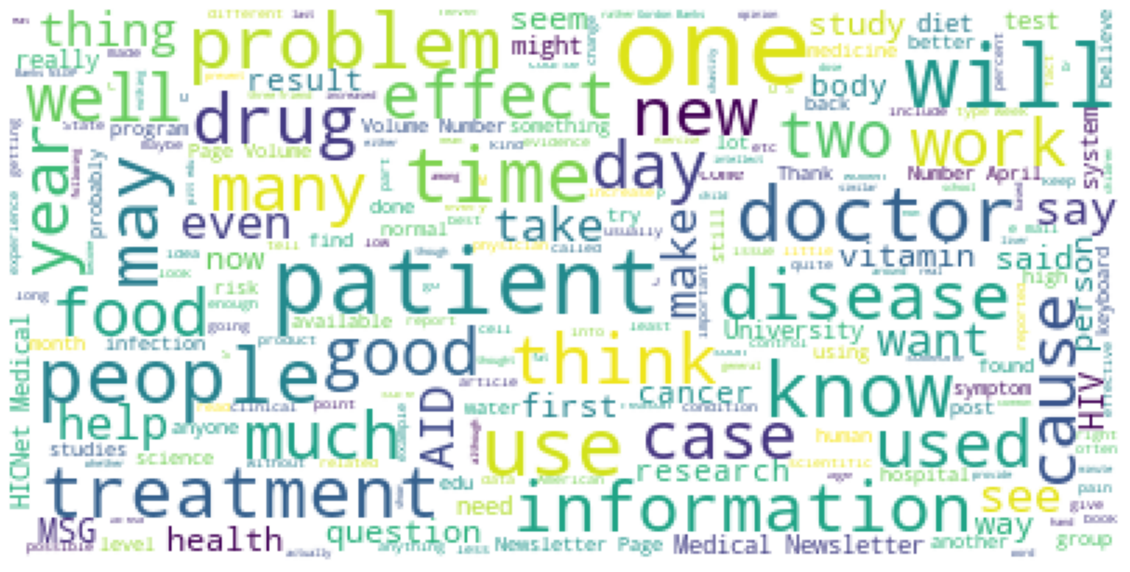





talk.politics.guns class word cloud



<Figure size 432x288 with 0 Axes>

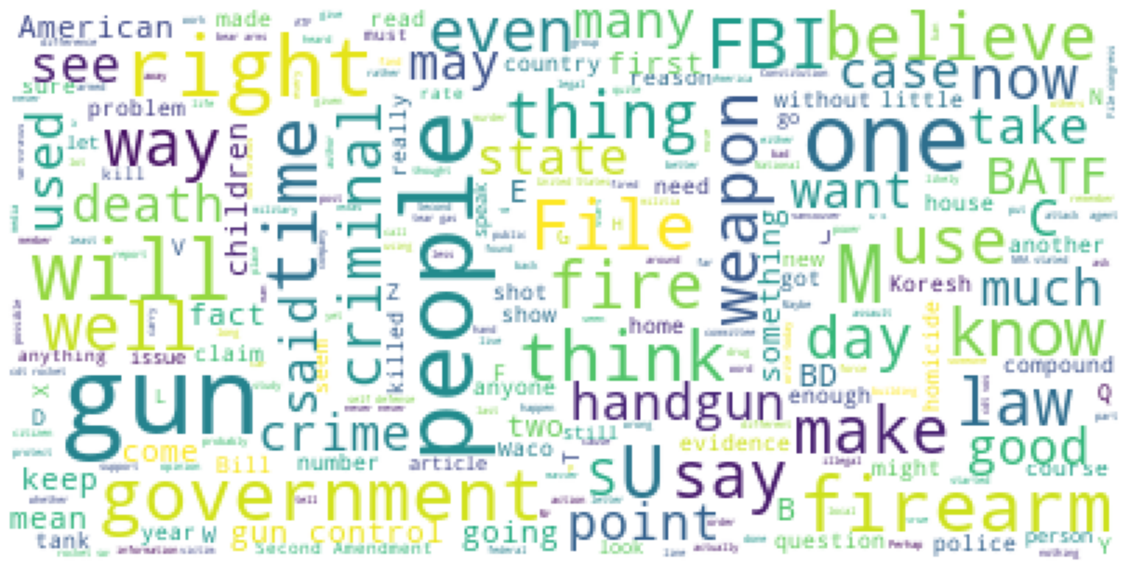

In [ ]:
from wordcloud import WordCloud
# text = " ".join(title_tr)
# wordcloud = WordCloud().generate(text)
# plt.figure()
# plt.subplots(figsize=(20,12))
# wordcloud = WordCloud(
#     background_color="white",
#     max_words=len(text),
#     max_font_size=40,
#     relative_scaling=.5).generate(text)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

sci_med, politics = [], []
for (msg, lab) in zip(title_tr, category_tr):
  if lab == 13:
    sci_med.append(msg)
  if lab == 16:
    politics.append(msg)

print("sci.med class word cloud\n")
text = " ".join(sci_med)
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
    background_color="white",
    max_words=len(text),
    max_font_size=40,
    relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("\n\n\n\ntalk.politics.guns class word cloud\n")
text = " ".join(politics)
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
    background_color="white",
    max_words=len(text),
    max_font_size=40,
    relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Data Preprocessing
## Word lemmatization
Lemmatize the messages using WordNet Lemmetizer

In [ ]:
word_lemmatizer = WordNetLemmatizer()
stopwords_set = set(stopwords.words("english"))

for i in range(len(title_tr)):
  msg_words = word_tokenize(title_tr[i])
  lemmatized_msg = ""
  for word in msg_words:
    if word not in stopwords_set:
      lemmatized_msg += word_lemmatizer.lemmatize(word) + " "
  title_tr[i] = lemmatized_msg

for i in range(len(title_te)):
  msg_words = word_tokenize(title_te[i])
  lemmatized_msg = ""
  for word in msg_words:
    if word not in stopwords_set:
      lemmatized_msg += word_lemmatizer.lemmatize(word) + " "
  title_te[i] = lemmatized_msg

## Vectorization of data
Vectorize the data using Bag of words (BOW)

In [ ]:
stop_words = nltk.corpus.stopwords.words("english")
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.001)
vectorizer.fit(title_tr)

Xtr = vectorizer.transform(title_tr)
Xte = vectorizer.transform(title_te)

# encoder = OneHotEncoder()
# encoder.fit(category_tr.reshape(-1, 1))
# Ytr = encoder.transform(category_tr.reshape(-1, 1))
# Yte = encoder.transform(category_te.reshape(-1, 1))

Lets look at what exactly is this vectorizer doing. We will first create reverse dictionary from the vectorizer. Iterating over the vectorized sentence _Nasa scientists are good_. We get the vector to be representative of three words "good", "nasa" and "scientists". The order has been changed because bag of words does not preserve order.

In [ ]:
preverse_vocabulary = {}
vocabulary = vectorizer.vocabulary_
for word in vocabulary:
    index = vocabulary[word]
    reverse_vocabulary[index] = word

vector = vectorizer.transform(iter(["This season so far, Morgan and Guzman helped to lead the Cubs at top in ERA, even better than THE rotation at Atlanta."]))
indexes = vector.indices
for i in indexes:
    print (reverse_vocabulary[i], end=" ")

top season rotation morgan lead helped far even era cubs better atlanta 

## Feature Reduction
We can check the variance of the feature and drop them based on a threshold

In [ ]:
print("Number of features before reduction : ", Xtr.shape[1])
scaler = StandardScaler(with_mean=False)
scaled_data_Xtr = scaler.fit_transform(Xtr)
scaled_data_Xte = scaler.transform(Xte)

def getExplainedVarianceRatio(reduced_vec, actual_vec):
  pass

Number of features before reduction :  9148


### PCA

In [ ]:
start_time = time()
pca = PCA(n_components=2048)
pca.fit(scaled_data_Xtr.toarray())
reduced_pca_Xtr = pca.transform(scaled_data_Xtr.toarray())
print("Time taken to perform dimensionality reduction using PCA" ,time() - start_time)
print("Number of features after reduction : ", reduced_pca_Xtr.shape[1])

In [ ]:
reduced_pca_Xtr[:,0].shape

(14134,)

[Text(0.5, 1.0, 'PCA projection with features=2')]

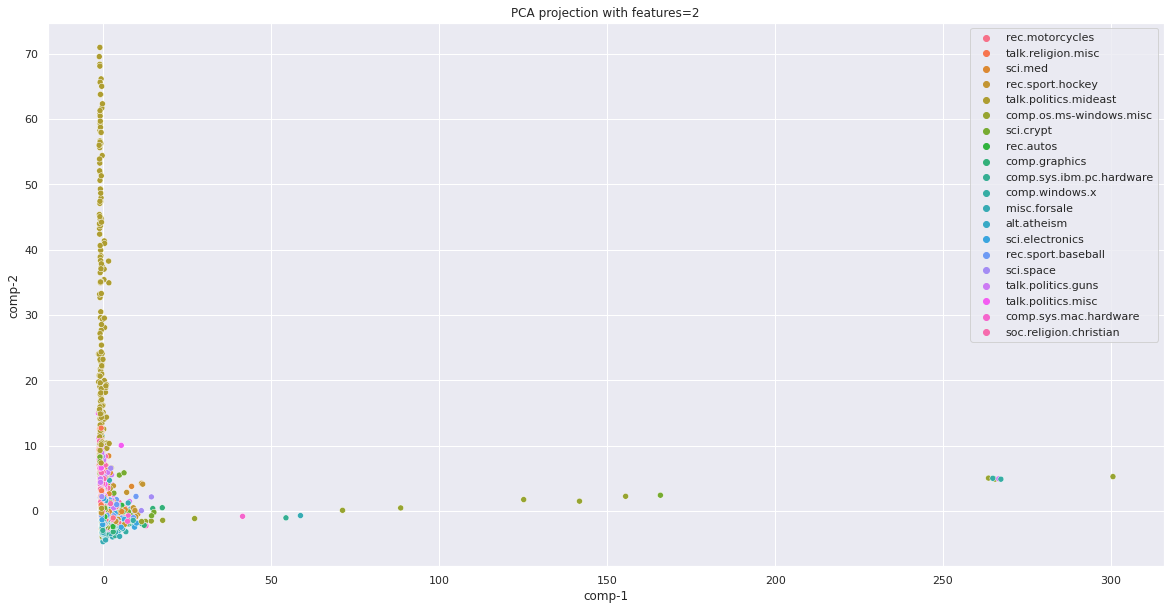

In [ ]:
umapdf = pd.DataFrame()
umapdf["y"] = [df.target_names[lab] for lab in category_tr]
umapdf["comp-1"] = reduced_pca_Xtr[:,0]
umapdf["comp-2"] = reduced_pca_Xtr[:,1]
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x="comp-1", y="comp-2", hue=umapdf.y.tolist(), data=umapdf).set(title="PCA projection with features=2") 
# plt.scatter(reduced_pca_Xtr[:,0], reduced_pca_Xtr[:,1], color = 'r')

Text(0.5, 1.0, 'Scree Plot')

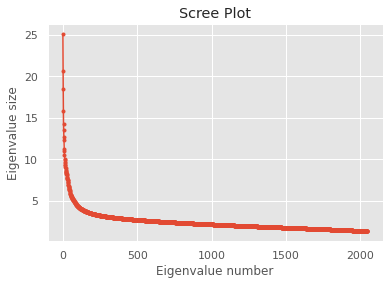

In [ ]:
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='.')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [ ]:
sum(pca.explained_variance_ratio_)

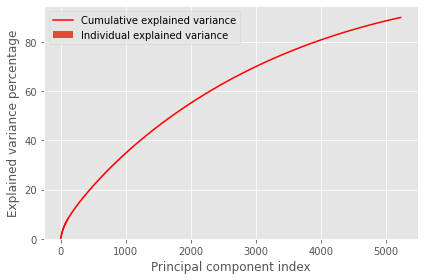

In [ ]:
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, len(exp_var)+1), exp_var, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_exp_var)+1), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
scaled_data = scaler.transform(Xte)
reduced_pca_Xte = pca.transform(scaled_data.toarray())

In [ ]:
start_time = time()
rf = RandomForestClassifier()
rf.fit(reduced_pca_Xtr, category_tr)
print("Time taken ", time()-start_time)
pred = rf.predict(reduced_pca_Xte)
print(classification_report(category_te, pred, target_names=df.target_names, digits=5))

Time taken  91.35251498222351


NameError: ignored

In [ ]:
reduced_pca_Xtr

array([[-0.31789834, -2.47129075,  2.51418832, ..., -0.26350059,
         0.90696736,  0.27010583],
       [-0.62175417, -0.278741  , -1.28095223, ...,  0.47701782,
        -0.93493704, -0.8951137 ],
       [ 0.28575623, -2.66895935,  3.29821951, ..., -0.14192891,
         1.72209603,  0.9821329 ],
       ...,
       [-0.54990965, -1.41664049,  0.53785292, ...,  2.33860564,
         1.19804147,  2.53668657],
       [-0.32547418, -2.10496476,  2.20219158, ...,  0.39960521,
        -0.65661429,  0.50684816],
       [-0.92297831,  5.2805116 , -6.26701952, ...,  0.77635004,
        -1.28833925,  0.60071016]])

In [ ]:
start_time = time()
svc = SVC()
svc.fit(scaled_data_Xtr, category_tr)
print("Time taken ", time()-start_time)
pred = svc.predict(scaled_data_Xte)
print(classification_report(category_te, pred, target_names=df.target_names, digits=5))

Time taken  255.65247130393982
                          precision    recall  f1-score   support

             alt.atheism    0.80838   0.66832   0.73171       202
           comp.graphics    0.68846   0.69112   0.68979       259
 comp.os.ms-windows.misc    0.55363   0.64000   0.59369       250
comp.sys.ibm.pc.hardware    0.62500   0.62500   0.62500       240
   comp.sys.mac.hardware    0.77551   0.61789   0.68778       246
          comp.windows.x    0.84286   0.72840   0.78146       243
            misc.forsale    0.80296   0.70563   0.75115       231
               rec.autos    0.72727   0.73029   0.72878       241
         rec.motorcycles    0.90870   0.76838   0.83267       272
      rec.sport.baseball    0.85657   0.80524   0.83012       267
        rec.sport.hockey    0.94787   0.81967   0.87912       244
               sci.crypt    0.93401   0.78970   0.85581       233
         sci.electronics    0.56429   0.71818   0.63200       220
                 sci.med    0.70492   0.8565

In [ ]:
print(classification_report(category_te, pred, target_names=df.target_names, digits=5))

                          precision    recall  f1-score   support

             alt.atheism    0.74214   0.60513   0.66667       195
           comp.graphics    0.62332   0.61504   0.61915       226
 comp.os.ms-windows.misc    0.68122   0.61417   0.64596       254
comp.sys.ibm.pc.hardware    0.57241   0.66667   0.61596       249
   comp.sys.mac.hardware    0.72277   0.62393   0.66972       234
          comp.windows.x    0.82857   0.74678   0.78555       233
            misc.forsale    0.83043   0.71004   0.76553       269
               rec.autos    0.74894   0.74894   0.74894       235
         rec.motorcycles    0.89686   0.81301   0.85288       246
      rec.sport.baseball    0.88210   0.77992   0.82787       259
        rec.sport.hockey    0.95690   0.81618   0.88095       272
               sci.crypt    0.89855   0.77824   0.83408       239
         sci.electronics    0.60000   0.76250   0.67156       240
                 sci.med    0.75000   0.84444   0.79443       270
         

In [ ]:
kmeans = KMeans(n_clusters=20, init='k-means++', max_iter=250)
start = time()
kmeans.fit(scaled_data_Xtr, category_tr)
print(time()-start)
pred = kmeans.predict(scaled_data_Xte)
def purity_score(y, yhat, km):
  c_mat = metrics.cluster.contingency_matrix(y, yhat)
  sns.set(rc={'figure.figsize':(20,20)})
  print("Homogeneity: %0.5f" % metrics.homogeneity_score(category_tr, km.labels_))
  print("Completeness: %0.5f" % metrics.completeness_score(category_tr, km.labels_))
  return np.sum(np.amax(c_mat, axis=0)) / np.sum(c_mat)
print(purity_score(pred, category_te, kmeans))

10.530874013900757
Homogeneity: 0.18773
Completeness: 0.50217
0.7746179966044142


**LDA -Linear Discriminant Analysis**

In [ ]:
start_time = time()
lda = LDA(n_components=19)
lda.fit(scaled_data_Xtr.toarray(), category_tr)
print("Time taken to perform dimensionality reduction using LDA",time() - start_time)
reduced_lda_Xtr = lda.transform(scaled_data_Xtr.toarray())

Time taken to perform dimensionality reduction using LDA 1039.3239920139313


[Text(0.5, 1.0, 'LDA projection with features=2')]

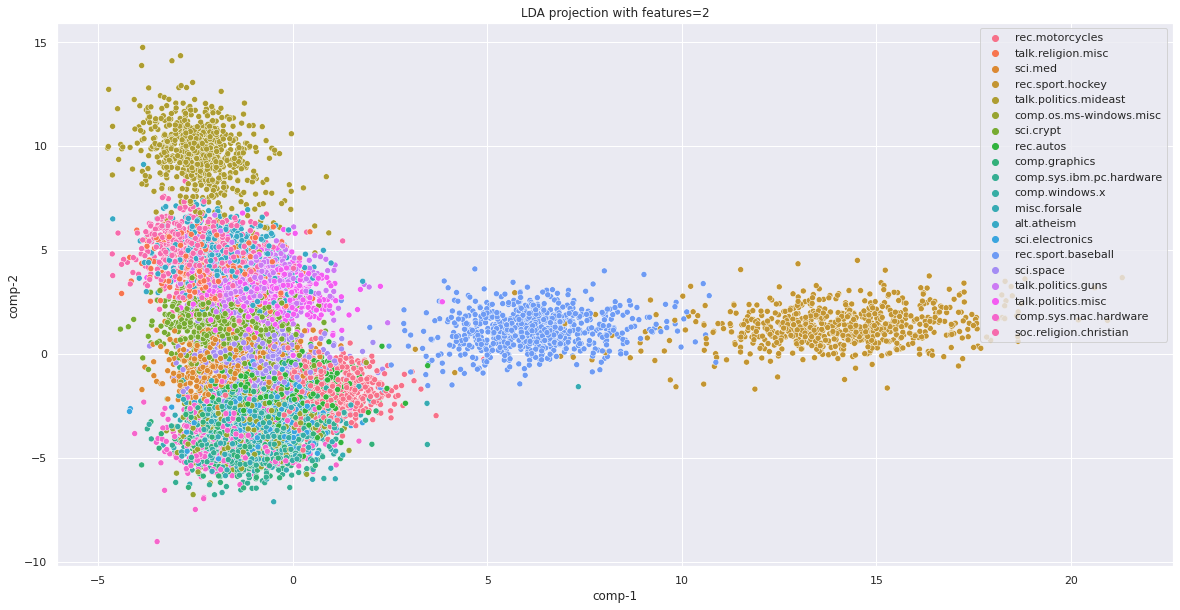

In [ ]:
umapdf = pd.DataFrame()
umapdf["y"] = [df.target_names[lab] for lab in category_tr]
umapdf["comp-1"] = reduced_lda_Xtr[:,0]
umapdf["comp-2"] = reduced_lda_Xtr[:,1]
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x="comp-1", y="comp-2", hue=umapdf.y.tolist(), data=umapdf).set(title="LDA projection with features=2") 
# plt.scatter(reduced_pca_Xtr[:,0], reduced_pca_Xtr[:,1], color = 'r')

In [ ]:
print("Explained Variance ratio for LDA is : ",sum(lda.explained_variance_ratio_))

Explained Variance ratio for LDA is :  1.0


In [ ]:
scaled_data = scaler.fit_transform(Xte)
reduced_lda_Xte = lda.transform(scaled_data.toarray())
rf = RandomForestClassifier()
rf.fit(reduced_lda_Xtr, category_tr)

pred = rf.predict(reduced_lda_Xte)
print(classification_report(category_te, pred, target_names=df.target_names))

In [ ]:
start = time()
svc = SVC()
svc.fit(reduced_lda_Xtr, category_tr)
print("Time taken to perform dimensionality reduction using LDA",time() - start)
# pred = svc.predict(reduced_lda_Xte)
# print(classification_report(category_te, pred, target_names=df.target_names))

Time taken to perform dimensionality reduction using LDA 0.5427994728088379


In [ ]:
6.5

In [ ]:
kmeans = KMeans()
kmeans.fit(reduced_lda_Xtr, category_tr)

pred = kmeans.predict(reduced_lda_Xte)
print(classification_report(category_te, pred, target_names=df.target_names))

**Kernal PCA**

In [ ]:
scaler = StandardScaler(with_mean=False)
scaled_data = scaler.fit_transform(Xtr)

print(category_tr)
start_time = time()
kpca = KernelPCA(kernel="sigmoid", n_components=2, gamma=.01)
z = kpca.fit_transform(scaled_data)
print("Time taken to perform dimensionality reduction using Kernal PCA" ,time() - start_time)


[ 8 19 13 ... 14  3 12]
Time taken to perform dimensionality reduction using Kernal PCA 27.488569736480713


[Text(0.5, 1.0, 'Kernel PCA projection with features=2')]

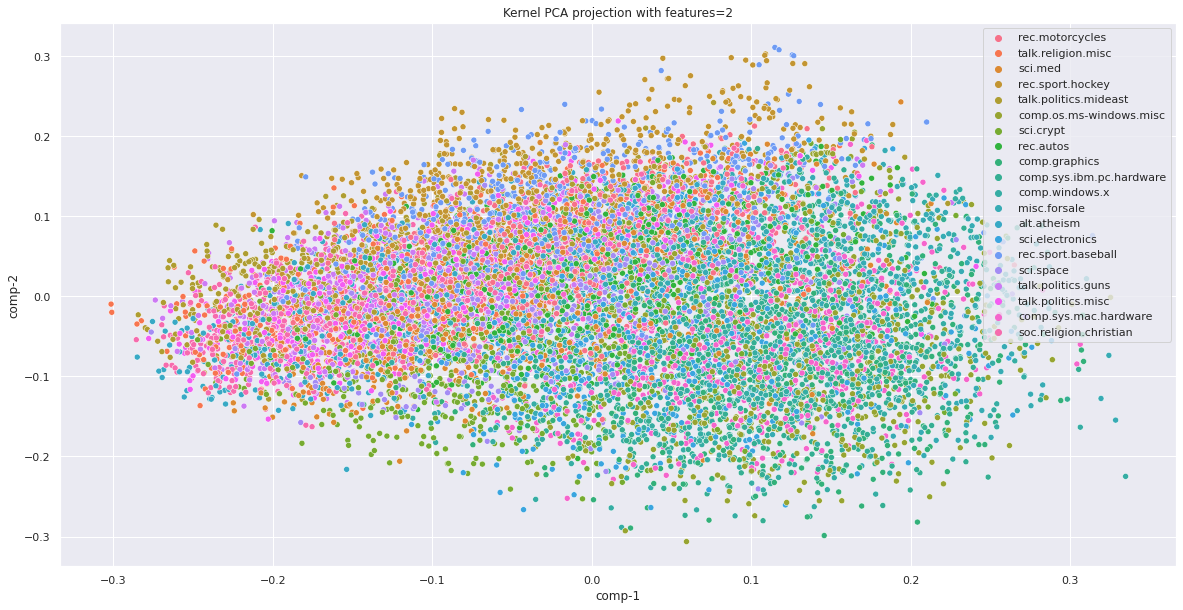

In [ ]:
umapdf = pd.DataFrame()
umapdf["y"] = [df.target_names[lab] for lab in category_tr]
umapdf["comp-1"] = z[:,0]
umapdf["comp-2"] = z[:,1]
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x="comp-1", y="comp-2", hue=umapdf.y.tolist(), data=umapdf).set(title="Kernel PCA projection with features=2") 
# plt.scatter(reduced_pca_Xtr[:,0], reduced_pca_Xtr[:,1], color = 'r')

[Text(0.5, 1.0, 'News KernelPCA projection')]

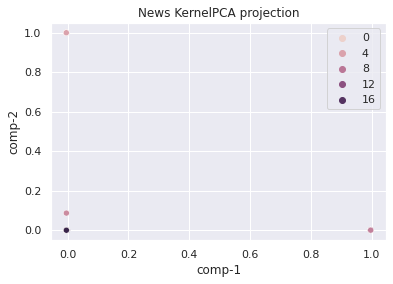

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="News KernelPCA projection") 

In [ ]:
scaler = StandardScaler(with_mean=False)
scaled_data = scaler.fit_transform(Xtr)

print(category_tr)
start_time = time()
kpca = KernelPCA(kernel="rbf", n_components=512, n_jobs=8)
#z = kpca.fit_transform(scaled_data)
reduced_tr = kpca.fit_transform(scaled_data)
print("Time taken to perform dimensionality reduction using Kernal PCA" ,time() - start_time)


[14 10 19 ... 19  3  6]


Random Forest Kernal PCA

In [ ]:
scaled_data = scaler.fit_transform(Xte)
reduced_kpca_Xte = kpca.transform(scaled_data.toarray())
rf = RandomForestClassifier()
start_time = time()
rf.fit(z, category_tr)

pred = rf.predict(reduced_kpca_Xte)
print(classification_report(category_te, pred, target_names=df.target_names,digits=5))
print("Time taken to train the model is : ", time()-start_time)

                          precision    recall  f1-score   support

             alt.atheism    0.44770   0.55440   0.49537       193
           comp.graphics    0.56410   0.66379   0.60990       232
 comp.os.ms-windows.misc    0.68137   0.56048   0.61504       248
comp.sys.ibm.pc.hardware    0.65025   0.53878   0.58929       245
   comp.sys.mac.hardware    0.67010   0.58824   0.62651       221
          comp.windows.x    0.71951   0.75641   0.73750       234
            misc.forsale    0.70683   0.71545   0.71111       246
               rec.autos    0.61091   0.72103   0.66142       233
         rec.motorcycles    0.71119   0.74060   0.72560       266
      rec.sport.baseball    0.80000   0.75294   0.77576       255
        rec.sport.hockey    0.85259   0.87347   0.86290       245
               sci.crypt    0.84444   0.75397   0.79665       252
         sci.electronics    0.55967   0.57143   0.56549       238
                 sci.med    0.69103   0.76753   0.72727       271
         

In [ ]:
scaled_data = scaler.fit_transform(Xte)
reduced_kpca_Xte = kpca.transform(scaled_data.toarray())
rf = RandomForestClassifier()
start_time = time()
rf.fit(z, category_tr)

pred = rf.predict(reduced_kpca_Xte)
print(classification_report(category_te, pred, target_names=df.target_names, digits=5))
print("Time taken to train the model is : ", time()-start_time)

                          precision    recall  f1-score   support

             alt.atheism    0.56459   0.50213   0.53153       235
           comp.graphics    0.66529   0.58333   0.62162       276
 comp.os.ms-windows.misc    0.63819   0.54043   0.58525       235
comp.sys.ibm.pc.hardware    0.65728   0.60345   0.62921       232
   comp.sys.mac.hardware    0.73000   0.58167   0.64745       251
          comp.windows.x    0.81481   0.76448   0.78884       259
            misc.forsale    0.66547   0.75820   0.70881       244
               rec.autos    0.66288   0.65056   0.65666       269
         rec.motorcycles    0.63175   0.82917   0.71712       240
      rec.sport.baseball    0.70037   0.79915   0.74651       234
        rec.sport.hockey    0.87815   0.87448   0.87631       239
               sci.crypt    0.80000   0.75536   0.77704       233
         sci.electronics    0.67513   0.53846   0.59910       247
                 sci.med    0.53681   0.78829   0.63869       222
         

K means Kernal PCA

In [ ]:
def purity_score(y, yhat):
  c_mat = metrics.cluster.contingency_matrix(y, yhat)
  sns.set(rc={'figure.figsize':(20,20)})
  print(sns.heatmap(c_mat, annot=True, ))
  return np.sum(np.amax(c_mat, axis=0)) / np.sum(c_mat)

Time taken to perform K mean clustering after dimensionality reduction performed using Kernal PCA :  1.3403456211090088
AxesSubplot(0.125,0.125;0.62x0.755)
0.09316638370118846


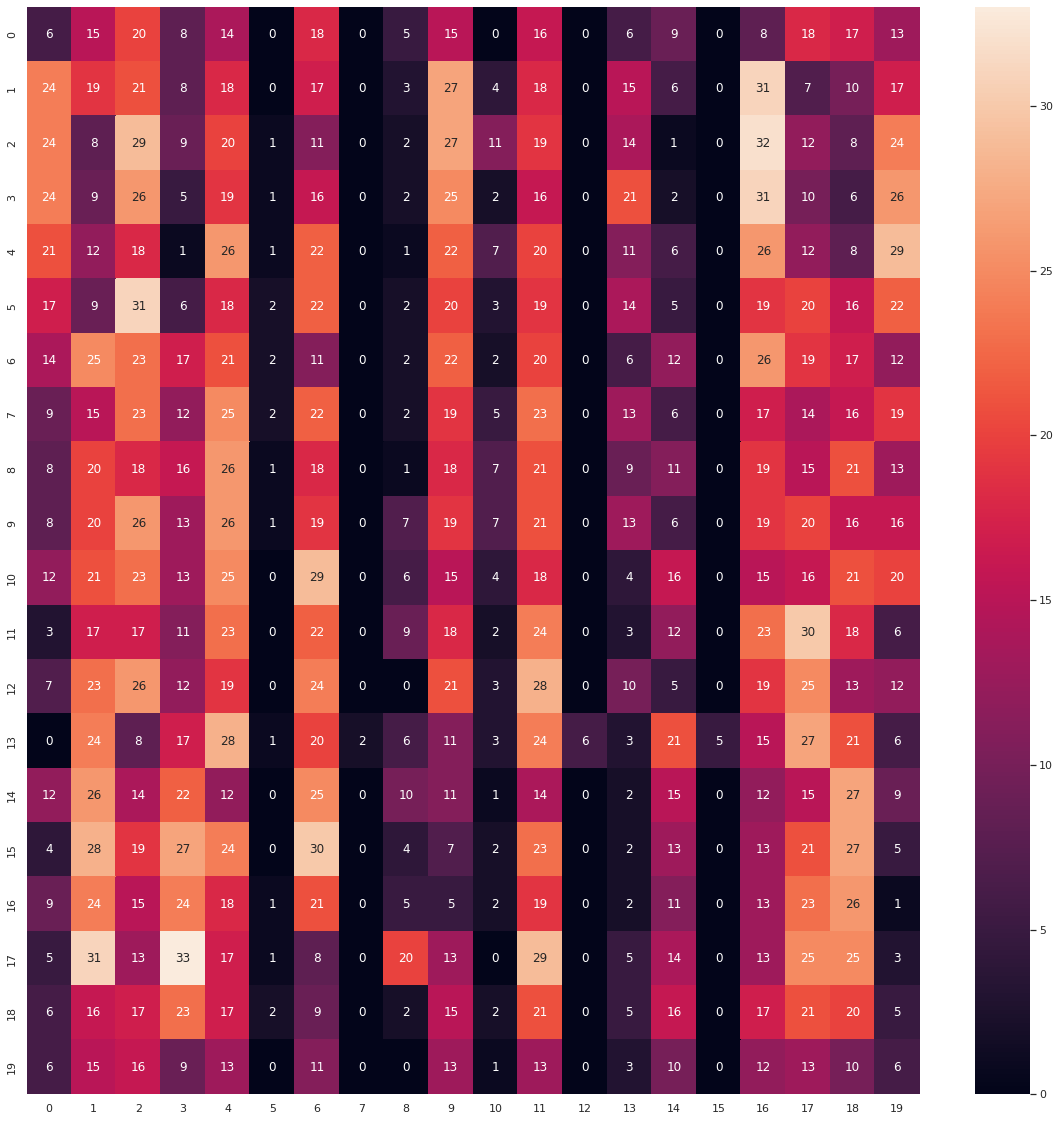

In [ ]:
scaled_data = scaler.fit_transform(Xte)
scaled_data_Xtr = scaler.fit_transform(Xtr)
reduced_kpca_Xte = kpca.transform(scaled_data.toarray())
rf = KMeans(n_clusters=20, init='k-means++', max_iter=250)
start_time = time()
# rf.fit(np.array([list(x) for x in reduced_tr], dtype="double"))
rf.fit(reduced_tr,category_tr)
pred = rf.predict(np.array([list(x) for x in reduced_kpca_Xte], dtype="double"))
print("Time taken to perform K mean clustering after dimensionality reduction performed using Kernal PCA : " , time()-start_time)
print(purity_score(category_te,pred))

In [ ]:
# refined_te = []
# refined_cat_te = []
# for i in range(len(reduced_te)):
#   if str(reduced_te[i][0]) != "nan":
#     refined_te.append(reduced_te[i])
#     refined_cat_te.append(category_te[i])
# pred = rf.predict(refined_te)
# print(classification_report(refined_cat_te, pred, target_names=df.target_names))
# print("Time taken ", time()-start_time)

In [ ]:
# start_time = time()
# kmeans = KMeans(n_clusters=20, init='k-means++', max_iter=100)
# kmeans.fit(scaled_data_Xtr, category_tr)
# print("Time taken ", time()-start_time)
# pred = kmeans.predict(reduced_kpca_Xte)
# print(purity_score(category_te,pred))
# print(classification_report(reduced_kpca_Xte, pred, target_names=df.target_names))

In [ ]:
# def purity_score(y, yhat):
#   c_mat = metrics.cluster.contingency_matrix(y, yhat)
#   sns.set(rc={'figure.figsize':(5,5)})
#   print(sns.heatmap(c_mat, annot=True, ))
#   return np.sum(np.amax(c_mat, axis=0)) / np.sum(c_mat)

UMAP

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 48.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=68fe732dc6b896f5291c0e93c437f899a43d367e05ad867f4846c04835c30fa9
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=baf2f6822e5136bf9bc2adf942c1ba6680adffc16c90dcd3f63dc769f0dd711a
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
import umap

scaler = StandardScaler(with_mean=False)
scaled_data = scaler.fit_transform(Xtr)
start = time()
umap_embedding = umap.UMAP(metric='hellinger', n_components=128)
reduced_tr = umap_embedding.fit_transform(scaled_data)
print(time() - start)

/usr/local/lib/python3.8/dist-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 516 edges.
It has only fully disconnected 12 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


144.1029064655304


[Text(0.5, 1.0, 'UMAP projection with features=2')]

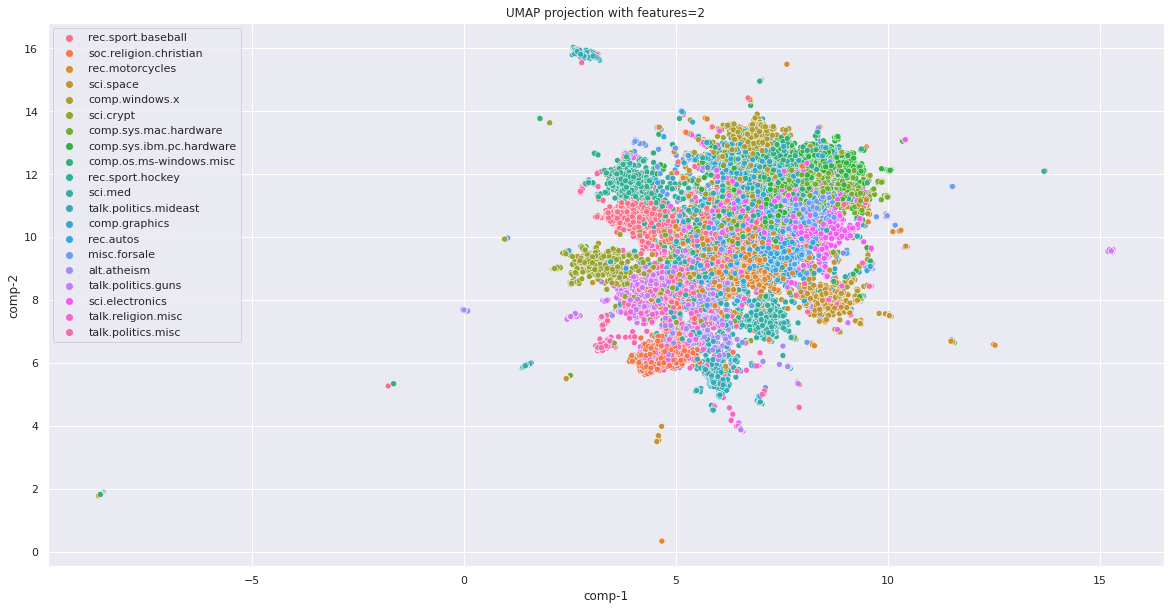

In [ ]:
umapdf = pd.DataFrame()
umapdf["y"] = [df.target_names[lab] for lab in category_tr]
umapdf["comp-1"] = reduced_tr[:,0]
umapdf["comp-2"] = reduced_tr[:,1]
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x="comp-1", y="comp-2", hue=umapdf.y.tolist(), data=umapdf).set(title="UMAP projection with features=2") 

In [ ]:
import numpy as np
refined_tr = reduced_tr[[not a for a in umap.utils.disconnected_vertices(umap_embedding)]]
refined_cat = category_tr[[not a for a in umap.utils.disconnected_vertices(umap_embedding)]]
# kmeans = KMeans(n_clusters=20, random_state=0).fit(refined_tr, refined_cat)
umap_scaled_Xte = scaler.transform(Xte)
# pred = kmeans.predict(umap_embedding.transform(umap_scaled_Xte))
# print(classification_report(category_te, pred, target_names=df.target_names))

reduced_te = umap_embedding.transform(umap_scaled_Xte)
refined_te = []
refined_cat_te = []
for i in range(len(reduced_te)):
  if str(reduced_te[i][0]) != "nan":
    refined_te.append(reduced_te[i])
    refined_cat_te.append(category_te[i])
# start_time = time()
# rf = KMeans(n_clusters=20, init='k-means++', max_iter=500)
# rf.fit(refined_tr)
# print("Time taken ", time()-start_time)

# pred = rf.predict(list(map(lambda x: x.astype('double'), refined_te)))
# print(pred, refined_cat_te)
# print(classification_report(refined_cat_te, pred, target_names=df.target_names, digits=5))

In [ ]:
start_time = time()
rf = KMeans(n_clusters=20, init='k-means++', max_iter=250)
rf.fit(np.array([list(x) for x in refined_tr], dtype="double"))
print("Time taken ", time()-start_time)

Time taken  4.134162902832031


In [ ]:
def purity_score(y, yhat, km):
  c_mat = metrics.cluster.contingency_matrix(y, yhat)
  sns.set(rc={'figure.figsize':(20,20)})
  print("Homogeneity: %0.5f" % metrics.homogeneity_score(category_tr[[not x for x in umap.utils.disconnected_vertices(umap_embedding)]], km.labels_))
  print("Completeness: %0.5f" % metrics.completeness_score(category_tr[[not x for x in umap.utils.disconnected_vertices(umap_embedding)]], km.labels_))
  return np.sum(np.amax(c_mat, axis=0)) / np.sum(c_mat)
print(purity_score(pred, refined_cat_te, rf))

In [ ]:
pred = rf.predict(np.array([list(x) for x in refined_te], dtype="double"))
print(purity_score(pred, refined_cat_te, rf))

Homogeneity: 0.41070
Completeness: 0.53255
0.5280135823429541


In [ ]:
import numpy as np

reduced_te = umap_embedding.transform(umap_scaled_Xte)


TypeError: ignored

In [ ]:
refined_te = []
refined_cat_te = []
for i in range(len(reduced_te)):
  if str(reduced_te[i][0]) != "nan":
    refined_te.append(reduced_te[i])
    refined_cat_te.append(category_te[i])
pred = rf.predict(refined_te)
print(classification_report(refined_cat_te, pred, target_names=df.target_names))
print("Time taken ", time()-start_time)

                          precision    recall  f1-score   support

             alt.atheism       0.17      0.62      0.26       212
           comp.graphics       0.48      0.44      0.46       252
 comp.os.ms-windows.misc       0.32      0.41      0.36       237
comp.sys.ibm.pc.hardware       0.43      0.44      0.44       267
   comp.sys.mac.hardware       0.62      0.28      0.39       247
          comp.windows.x       0.63      0.36      0.46       237
            misc.forsale       0.55      0.38      0.45       229
               rec.autos       0.61      0.37      0.46       236
         rec.motorcycles       0.54      0.53      0.54       223
      rec.sport.baseball       0.69      0.56      0.62       236
        rec.sport.hockey       0.84      0.65      0.74       242
               sci.crypt       0.62      0.55      0.59       249
         sci.electronics       0.46      0.32      0.38       248
                 sci.med       0.72      0.52      0.60       250
         

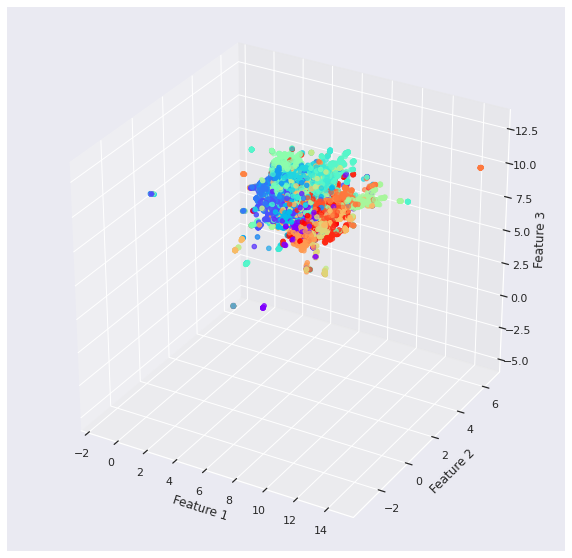

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# fig = plt.figure(figsize=(10,10))
# ax = Axes3D(fig)
# fig.add_axes(ax)

# colors = cm.rainbow(np.linspace(0, 1, 20))
# colors_labels = [colors[lab] for lab in category_tr]
# sc = ax.scatter(reduced_tr[:,0], reduced_tr[:,1], reduced_tr[:,2], c=colors_labels)
# sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = reduced_tr[:,0]
y = reduced_tr[:,1]
z = reduced_tr[:,2]

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

ax.scatter(x, y, z, c=colors_labels)

In [ ]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x]])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

## Sampling data
We will count the number of diffrent labels in dataset and plot a pie chart distribution.

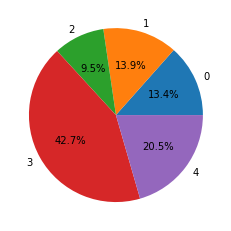

In [ ]:
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

As we can see the class labels are not uniformy distributed so we will use SMOT and oversample the classes which are less in number so that classes are equally distributed

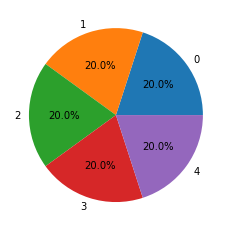

In [ ]:
sm = SMOTE(random_state=42)
Xtr, Ytr = sm.fit_sample(Xtr, Ytr)
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

# Train Models
### Baseline Model
“stratified”: generates predictions by respecting the training set’s class distribution.

In [ ]:
dc = DummyClassifier(strategy="stratified")
dc.fit(Xtr, Ytr)
pred = dc.predict(Xte)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.08      0.14      0.10        80
  Criminal Justice       0.10      0.17      0.12        66
       Health Care       0.12      0.20      0.15        70
 Politics & Policy       0.47      0.22      0.30       260
  Science & Health       0.16      0.15      0.16       118

          accuracy                           0.19       594
         macro avg       0.19      0.18      0.17       594
      weighted avg       0.27      0.19      0.21       594



### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(Xtr, Ytr)
pred = dt.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.29      0.53      0.37        80
  Criminal Justice       0.45      0.45      0.45        66
       Health Care       0.37      0.53      0.44        70
 Politics & Policy       0.76      0.49      0.59       260
  Science & Health       0.47      0.45      0.46       118

          accuracy                           0.49       594
         macro avg       0.47      0.49      0.46       594
      weighted avg       0.56      0.49      0.50       594



In [ ]:
vector = vectorizer.transform(iter(['Nasa scientists are good']))
selection = VarianceThreshold(threshold=0.001)
vector_whole = copy.deepcopy(vector)
selection.fit(vector_whole)
predic_single = selection.transform(vector_whole)

ValueError: No feature in X meets the variance threshold 0.00100 (X contains only one sample)

In [ ]:
predic_single = selection.transform(vector)

NotFittedError: This VarianceThreshold instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
dt.predict(vector)

ValueError: Number of features of the model must match the input. Model n_features is 1782 and input n_features is 4374 

In [ ]:
headline = 'Coronavirus updates: FDA approves remdesivir as treatment for COVID-19; blood supply shortage looms; most Americans immunized by June?'


### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(Xtr, Ytr)
pred = rf.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.55      0.43      0.48        93
  Criminal Justice       0.57      0.39      0.46        74
       Health Care       0.48      0.61      0.53        51
 Politics & Policy       0.66      0.63      0.65       240
  Science & Health       0.51      0.65      0.57       136

       avg / total       0.58      0.57      0.57       594



### Multinomial Naive Bayesian

In [ ]:
nb = MultinomialNB()
nb.fit(Xtr, Ytr)
pred = nb.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.58      0.60      0.59        93
  Criminal Justice       0.55      0.54      0.54        74
       Health Care       0.45      0.65      0.53        51
 Politics & Policy       0.71      0.67      0.69       240
  Science & Health       0.66      0.61      0.63       136

       avg / total       0.64      0.63      0.63       594



### Support Vector Classification

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtr, Ytr)
pred = svc.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.23      0.92      0.37        93
  Criminal Justice       1.00      0.12      0.22        74
       Health Care       0.57      0.31      0.41        51
 Politics & Policy       0.88      0.25      0.39       240
  Science & Health       0.57      0.51      0.53       136

       avg / total       0.70      0.41      0.40       594



### Multilayered Perceptron

In [ ]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 20), random_state=1, max_iter=400)
mlp.fit(Xtr, Ytr)
pred = mlp.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.52      0.54      0.53        93
  Criminal Justice       0.60      0.43      0.50        74
       Health Care       0.50      0.59      0.54        51
 Politics & Policy       0.66      0.71      0.69       240
  Science & Health       0.64      0.60      0.62       136

       avg / total       0.61      0.61      0.61       594



# Final Model: Multinomial Naive Bayesian
**Multinomial Naive Bayesian** works the best. Lets run NB on our test data and get the confusion matrix and its heat map.
## Predict test data

                    precision    recall  f1-score   support

Business & Finance       0.48      0.50      0.49       105
  Criminal Justice       0.57      0.58      0.57       111
       Health Care       0.51      0.70      0.59        89
 Politics & Policy       0.74      0.63      0.68       341
  Science & Health       0.62      0.67      0.64       146

       avg / total       0.64      0.62      0.62       792



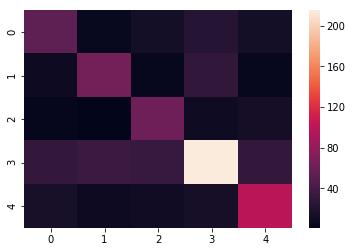

In [ ]:
pred = nb.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))
sns.heatmap(confusion_matrix(Yte, pred))

## Multinomial Naive Bayesian Explained
We will now try to understand why Naive Bayesian is getting good results. We will get all the coefficents of the features and then print the top 20 words based on its weight. As we can see all the words are closely related to the category, hence multinomial naive bayesian predcits correct label with good F1 score.

In [ ]:
nb1 = MultinomialNB()
nb1.fit(Xtr_whole, Ytr_whole)
coefs = nb1.coef_
target_names = encoder.classes_

for i in range(len(target_names)):
    words = []
    for j in coefs[i].argsort()[-20:]:
        words.append(reverse_vocabulary[j])
    print (target_names[i], '-', words, "\n")

Business & Finance - ['world', 'every', 'america', 'chart', '000', 'apple', 'plan', 'one', 'deal', 'explained', 'us', 'greek', 'big', 'google', 'crisis', 'â', 'economy', 'people', 'could', 'new'] 

Criminal Justice - ['â', 'justice', 'jury', 'explained', 'shot', 'chart', 'grand', 'eric', 'war', 'new', 'people', 'michael', 'black', 'one', 'brown', 'darren', 'wilson', 'marijuana', 'police', 'ferguson'] 

Health Care - ['birth', 'america', 'million', 'us', 'control', 'study', 'people', 'uninsured', 'doctors', 'â', 'year', 'could', 'new', 'one', 'medicaid', '000', 'care', 'va', 'health', 'obamacare'] 

Politics & Policy - ['paul', '2016', 'republicans', 'clinton', 'walker', 'trump', 'people', 'america', 'big', 'explained', 'president', 'new', 'gop', 'house', 'debate', 'republican', 'one', 'â', 'obamacare', 'obama'] 

Science & Health - ['cancer', 'could', 'dr', 'food', 'know', 'might', 'pluto', 'year', 'us', 'health', 'think', 'big', 'space', 'people', 'nasa', 'one', 'science', 'scientists

In [ ]:
import numpy as np
data = np.load('/content/parameters_details.npy', allow_pickle=True)
data

array({'input': '/home/pdutta/Data/DGCCA/TCGA_BRCA/methyl_rnaseq_mirna_minmax.tsv', 'n': 3, 'arch': '[[1000,500],[900,400],[200,150]]', 'epochs': 2, 'latDim': 100, 'lr': 1e-06, 'l1': 0.001, 'l2': 0.0001, 'log_path': '/home/pdutta/Data/DGCCA/results/BRCA/logs/BRCA', 'model_path': '/home/pdutta/Data/DGCCA/results/BRCA/saved_models/views=3_numEpochs=2__val_batch_size=64__train_batch_size=64__arch=[[1000,500],[900,400],[200,150]]__lr=0.000001__latDim=100', 'embedPath': '/home/pdutta/Data/DGCCA/results/BRCA/embeddings/views=3_numEpochs=2__val_batch_size=64__train_batch_size=64__arch=[[1000,500],[900,400],[200,150]]__lr=0.000001__latDim=100', 'final_embed_path': '/home/pdutta/Github/Multiview_clustering_DGCCA/results/final_embedding/BRCA/views=3_numEpochs=2__val_batch_size=64__train_batch_size=64__arch=[[1000,500],[900,400],[200,150]]__lr=0.000001__latDim=100', 'base_name': 'views=3_numEpochs=2__val_batch_size=64__train_batch_size=64__arch=[[1000,500],[900,400],[200,150]]__lr=0.000001__latDi

In [ ]:
for key, val in data.tolist():
  print(key)

ValueError: ignored

In [ ]:
print(type(data.tolist()))

<class 'dict'>


In [ ]:
read_dictionary = np.load('/content/parameters_details.npy', allow_pickle='TRUE').item()

In [ ]:
data.tolist().keys()

dict_keys(['input', 'n', 'arch', 'epochs', 'latDim', 'lr', 'l1', 'l2', 'log_path', 'model_path', 'embedPath', 'final_embed_path', 'base_name', 'cancer_type', 'num_workers', 'train_batch_size', 'val_batch_size'])

In [ ]:
board = [["a","a","b","a","a","b"],["a","a","b","b","b","a"],["a","a","a","a","b","a"],["b","a","b","b","a","b"],["a","b","b","a","b","a"],["b","a","a","a","a","b"]]

In [ ]:
board

[['a', 'a', 'b', 'a', 'a', 'b'],
 ['a', 'a', 'b', 'b', 'b', 'a'],
 ['a', 'a', 'a', 'a', 'b', 'a'],
 ['b', 'a', 'b', 'b', 'a', 'b'],
 ['a', 'b', 'b', 'a', 'b', 'a'],
 ['b', 'a', 'a', 'a', 'a', 'b']]

In [ ]:
word = "bbbaabbbbbab"